<a href="https://colab.research.google.com/github/earo12/Business-Forecasting/blob/main/Business_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('adidas-quarterly-sales.csv')
df.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [3]:
df.isnull().sum()

Time Period    0
Revenue        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  88 non-null     object
 1   Revenue      88 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [5]:
df.shape

(88, 2)

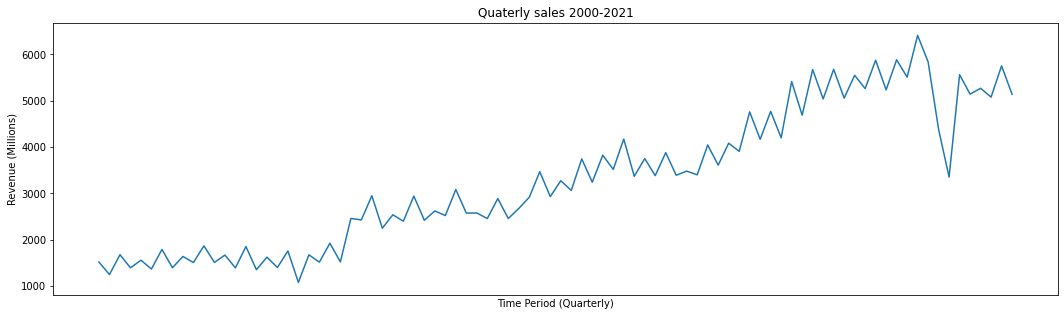

In [6]:
plt.rcParams['figure.figsize'] = (18,5)
ax = sns.lineplot(data = df, x = df['Time Period'], y = df['Revenue'])
ax.set_xticks([])
plt.xlabel('Time Period (Quarterly)')
plt.ylabel('Revenue (Millions)')
plt.title('Quaterly sales 2000-2021')
plt.show()

In [7]:
values = seasonal_decompose(df['Revenue'], model = 'multiplicative', period = 30)

<Figure size 1296x360 with 0 Axes>

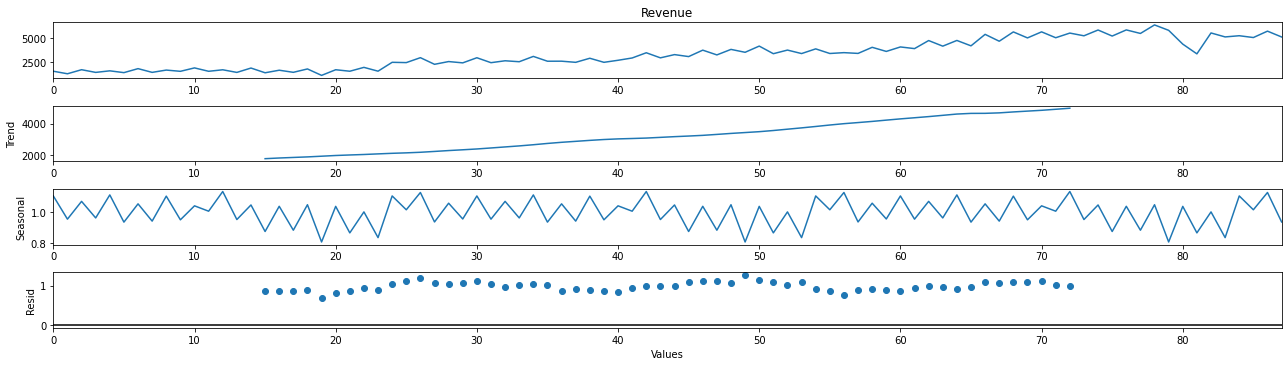

In [8]:
plt.figure()
values.plot()
#plt.set_size_inches(15,10)
plt.xlabel('Values')
plt.show()